In [2]:
# Cell 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Cell 2: Load the data
train_df = pd.read_csv('../data/raw/KDDTrain+.csv')
test_df = pd.read_csv('../data/raw/KDDTest+.csv')

print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")
print(f"\nColumns: {train_df.shape[1]}")
print(f"Features: {train_df.shape[1] - 2}")  # Minus label and difficulty

Training set: (125973, 43)
Test set: (22544, 43)

Columns: 43
Features: 41


In [4]:
# Cell 3: Check data quality
print("Missing values in training set:")
print(train_df.isnull().sum().sum())

print("\nData types:")
print(train_df.dtypes.value_counts())

print("\nFirst few rows:")
train_df.head()

Missing values in training set:
0

Data types:
int64      24
float64    15
str         4
Name: count, dtype: int64

First few rows:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


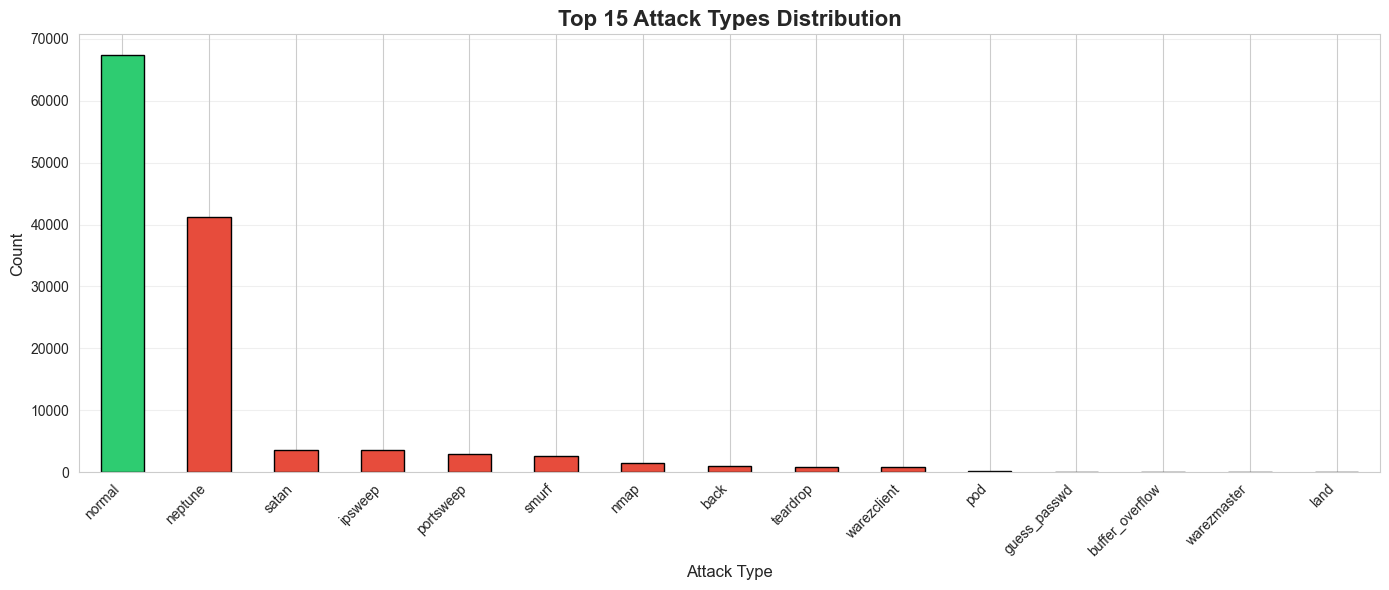


Total unique attack types: 23


In [5]:
# Cell 4: Attack type distribution
plt.figure(figsize=(14, 6))
attack_counts = train_df['label'].value_counts().head(15)
colors = ['#2ecc71' if x == 'normal' else '#e74c3c' for x in attack_counts.index]

attack_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Top 15 Attack Types Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal unique attack types: {train_df['label'].nunique()}")

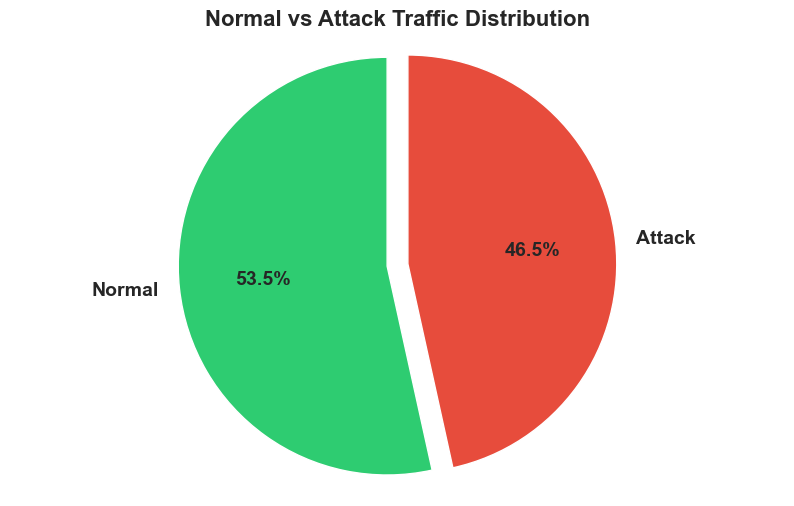

Normal: 67,343 (53.46%)
Attack: 58,630 (46.54%)


In [6]:
# Cell 5: Binary classification (Normal vs Attack)
train_df['is_attack'] = train_df['label'].apply(lambda x: 0 if x == 'normal' else 1)

plt.figure(figsize=(10, 6))
colors_pie = ['#2ecc71', '#e74c3c']
labels_pie = ['Normal', 'Attack']
sizes = train_df['is_attack'].value_counts().sort_index()

plt.pie(sizes, labels=labels_pie, autopct='%1.1f%%', colors=colors_pie, 
        startangle=90, textprops={'fontsize': 14, 'weight': 'bold'},
        explode=(0.05, 0.05))
plt.title('Normal vs Attack Traffic Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

print(f"Normal: {sizes[0]:,} ({sizes[0]/len(train_df)*100:.2f}%)")
print(f"Attack: {sizes[1]:,} ({sizes[1]/len(train_df)*100:.2f}%)")

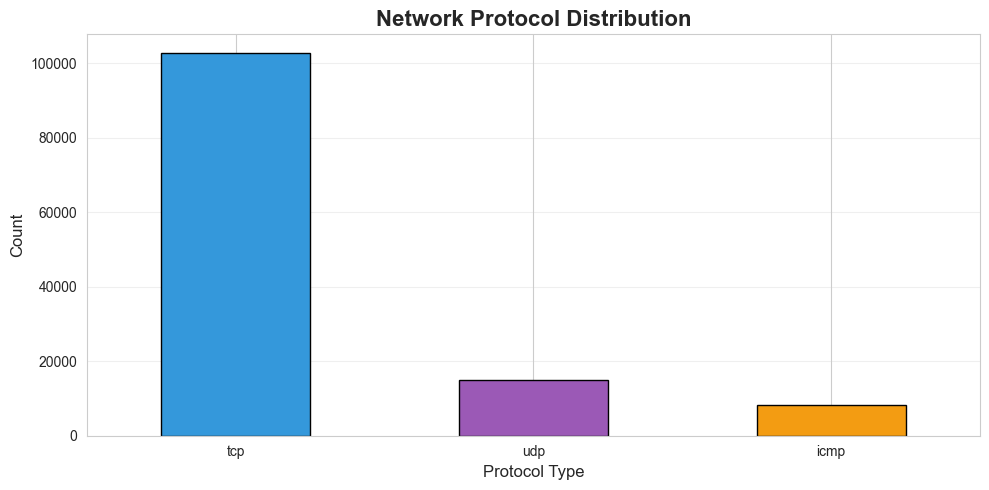

In [7]:
# Cell 6: Protocol distribution
plt.figure(figsize=(10, 5))
protocol_counts = train_df['protocol_type'].value_counts()
colors_protocol = ['#3498db', '#9b59b6', '#f39c12']

protocol_counts.plot(kind='bar', color=colors_protocol, edgecolor='black')
plt.title('Network Protocol Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Protocol Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

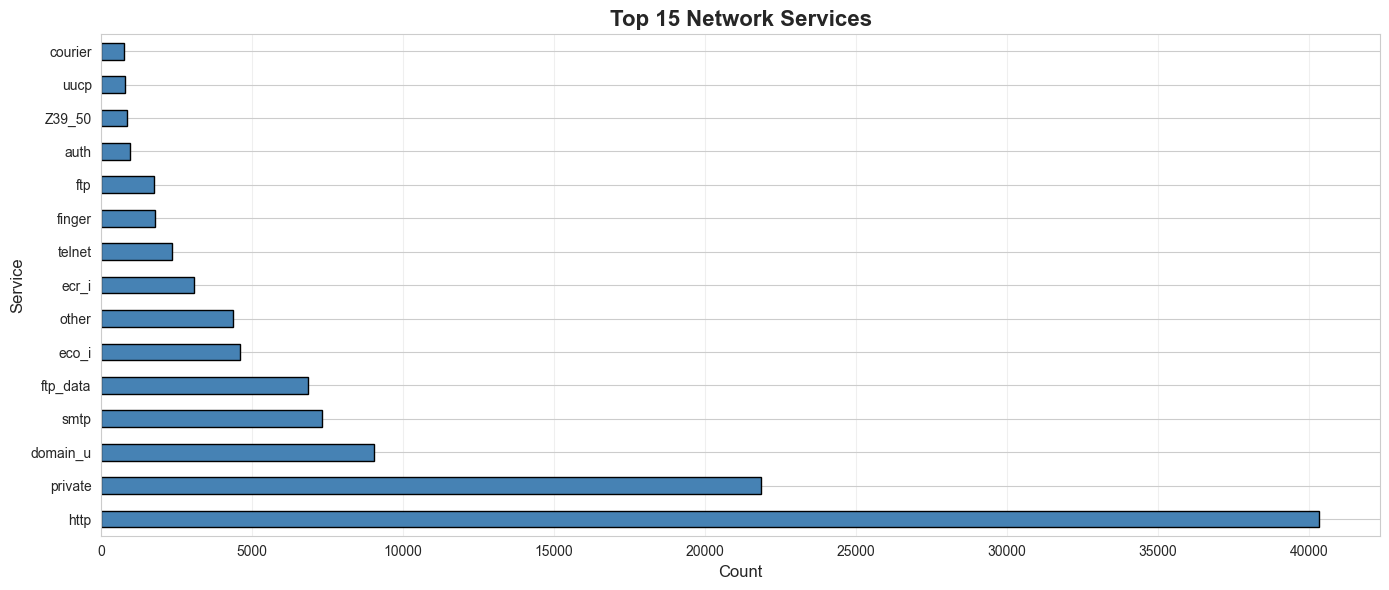

In [8]:
# Cell 7: Service distribution (top 15)
plt.figure(figsize=(14, 6))
service_counts = train_df['service'].value_counts().head(15)

service_counts.plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Top 15 Network Services', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Service', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

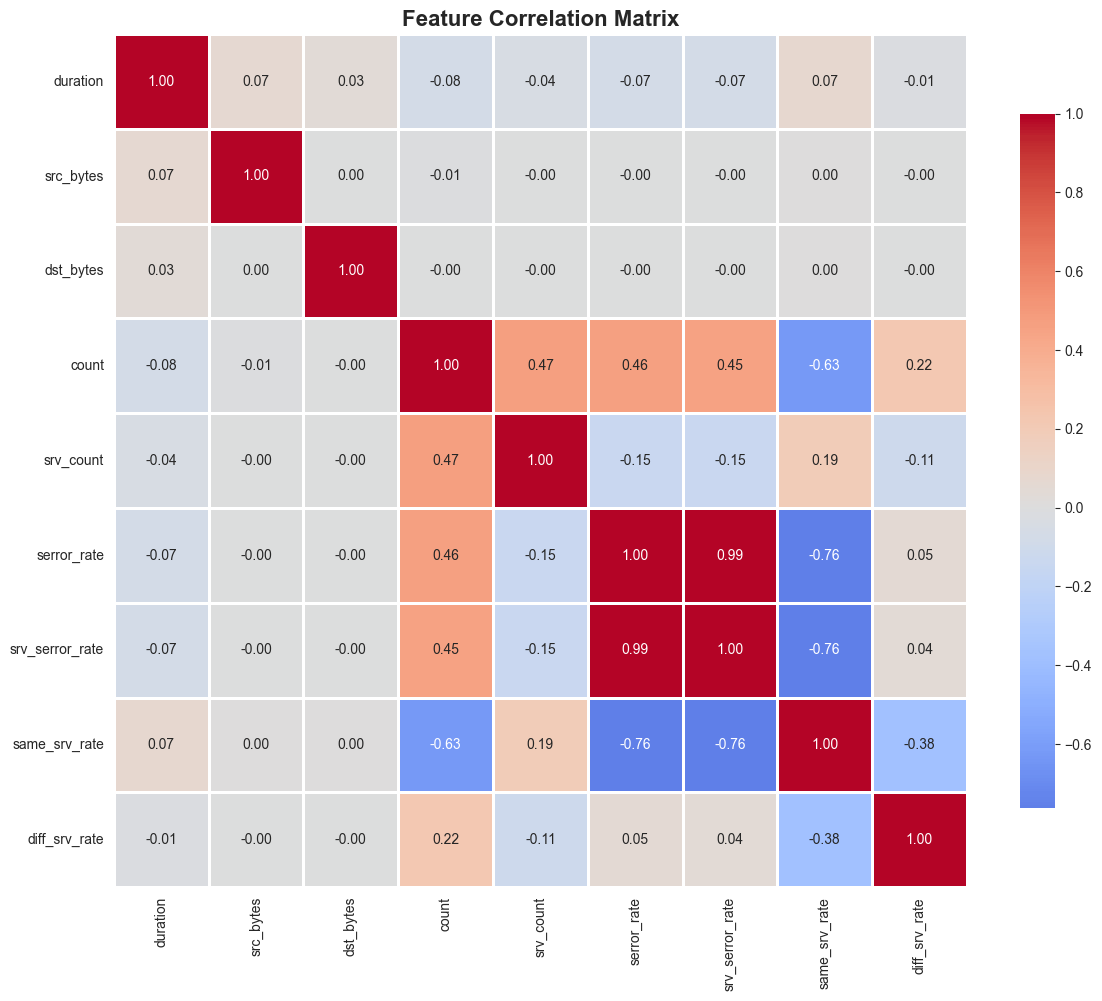

In [9]:
# Cell 8: Feature correlation (numerical features)
numerical_cols = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 
                  'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate']

plt.figure(figsize=(12, 10))
correlation_matrix = train_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

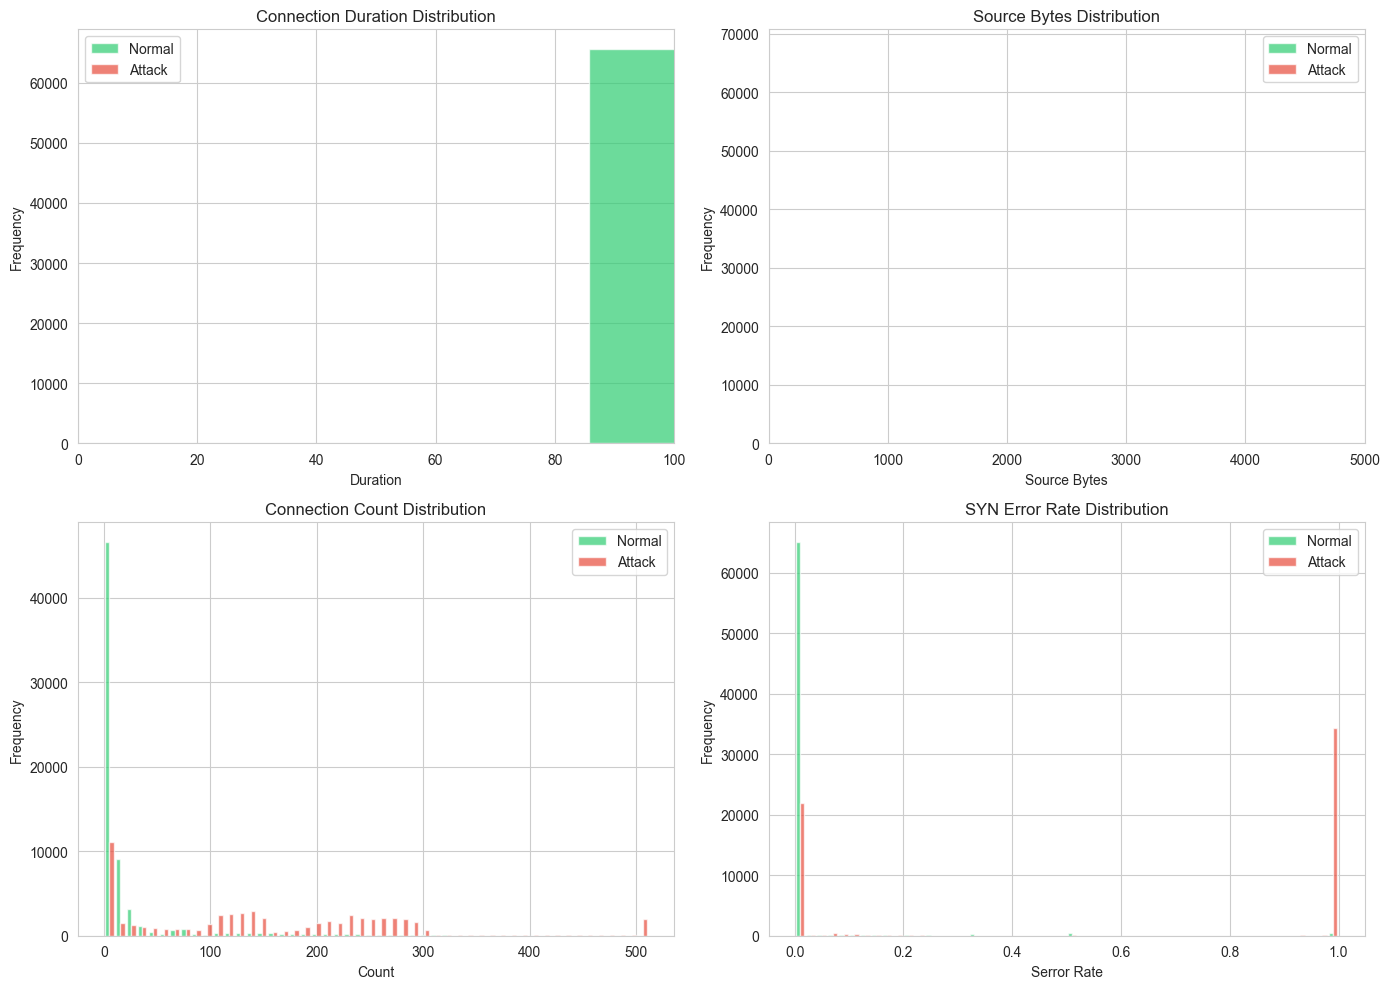

In [10]:
# Cell 9: Attack vs Normal - Feature comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Duration
axes[0, 0].hist([train_df[train_df['is_attack']==0]['duration'], 
                 train_df[train_df['is_attack']==1]['duration']], 
                bins=50, label=['Normal', 'Attack'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 0].set_xlabel('Duration')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Connection Duration Distribution')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 100)

# Source Bytes
axes[0, 1].hist([train_df[train_df['is_attack']==0]['src_bytes'], 
                 train_df[train_df['is_attack']==1]['src_bytes']], 
                bins=50, label=['Normal', 'Attack'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 1].set_xlabel('Source Bytes')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Source Bytes Distribution')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 5000)

# Count
axes[1, 0].hist([train_df[train_df['is_attack']==0]['count'], 
                 train_df[train_df['is_attack']==1]['count']], 
                bins=50, label=['Normal', 'Attack'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Connection Count Distribution')
axes[1, 0].legend()

# Serror Rate
axes[1, 1].hist([train_df[train_df['is_attack']==0]['serror_rate'], 
                 train_df[train_df['is_attack']==1]['serror_rate']], 
                bins=50, label=['Normal', 'Attack'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 1].set_xlabel('Serror Rate')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('SYN Error Rate Distribution')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [11]:
# Cell 10: Summary statistics
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"\n📊 Total Samples: {len(train_df):,}")
print(f"📊 Features: {len(train_df.columns) - 2}")
print(f"📊 Attack Types: {train_df['label'].nunique()}")
print(f"📊 Protocol Types: {train_df['protocol_type'].nunique()}")
print(f"📊 Services: {train_df['service'].nunique()}")

print("\n📈 Key Statistics:")
print(train_df[['duration', 'src_bytes', 'dst_bytes', 'count']].describe())

DATASET SUMMARY

📊 Total Samples: 125,973
📊 Features: 42
📊 Attack Types: 23
📊 Protocol Types: 3
📊 Services: 70

📈 Key Statistics:
           duration     src_bytes     dst_bytes          count
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000
mean      287.14465  4.556674e+04  1.977911e+04      84.107555
std      2604.51531  5.870331e+06  4.021269e+06     114.508607
min         0.00000  0.000000e+00  0.000000e+00       0.000000
25%         0.00000  0.000000e+00  0.000000e+00       2.000000
50%         0.00000  4.400000e+01  0.000000e+00      14.000000
75%         0.00000  2.760000e+02  5.160000e+02     143.000000
max     42908.00000  1.379964e+09  1.309937e+09     511.000000
